# Cars4U Project: Pricing Model to effectively predict the price of used cars

### Context
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

### Objective
1. Generate insights from the data to help business.
2. Build a linear regression model to predict the prices of used cars.

### Data Dictionary
1. S.No. : Serial Number
2. Name : Name of the car which includes Brand name and Model name
3. Location : The location in which the car is being sold or is available for purchase Cities
4. Year : Manufacturing year of the car
5. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
6. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission : The type of transmission used by the car. (Automatic / Manual)
8. Owner : Type of ownership
9. Mileage : The standard mileage offered by the car company in kmpl or km/kg
10. Engine : The displacement volume of the engine in CC.
11. Power : The maximum power of the engine in bhp.
12. Seats : The number of seats in the car.
13. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
14. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

### Importing necessary packages

In [91]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

### Read dataset from the csv file

In [92]:
cars = pd.read_csv("used_cars_data.csv")

### Checking the first 5 rows of data

In [93]:
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


- We can drop S.No as we already have an index

In [94]:
cars.drop(["S.No."], axis = 1, inplace = True) #Removing S.No column

### Checking the shape of the dataset

In [95]:
cars.shape

(7253, 13)

* There are 7253 rows and 13 columns in the dataset

In [96]:
#make another copy of data
df = cars.copy()

### Check data types of the variables and missing values in the dataset

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


- There are 7253 rows and 13 columns in the dataset
- Transmission, Fuel_Type, Owner_Type can to be converted into category
- There are only 1006 non null values in New_Price, we will try to impute data

In [98]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


- We need to remove units from Mileage, Engine, Power and New_Price columns.
- Then adjust the data types accordingly
- We can create a new column for Brand/Make of the car

In [99]:
#Picking a random sample from the dataset to take a glance of the data
np.random.seed(2)
df.sample(n=15)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4584,Tata Tigor 1.05 Revotorq XT,Kochi,2018,28973,Diesel,Manual,First,24.7 kmpl,1047 CC,69 bhp,5.0,NaN,6.64
6505,Volkswagen Vento Diesel Highline,Chennai,2011,76041,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
3675,Maruti Swift VDI,Ahmedabad,2012,65000,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,NaN,3.90
5654,Hyundai i20 Magna Optional 1.2,Kochi,2014,42315,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.0,NaN,4.79
4297,Toyota Camry 2.5 G,Mumbai,2014,68400,Petrol,Automatic,First,12.98 kmpl,2494 CC,178.4 bhp,5.0,NaN,13.50
2603,Mercedes-Benz New C-Class 220 CDI AT,Jaipur,2010,74213,Diesel,Automatic,First,14.84 kmpl,2143 CC,170 bhp,5.0,NaN,11.50
4337,Volkswagen Vento Petrol Highline AT,Kochi,2014,32283,Petrol,Automatic,Second,14.4 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.41
6625,Maruti Swift VDI BSIV,Kolkata,2012,72000,Diesel,Manual,First,17.8 kmpl,1248 CC,null bhp,5.0,NaN,NaN
2846,Skoda Superb Elegance 1.8 TSI AT,Kochi,2011,73783,Petrol,Automatic,Second,13.7 kmpl,1798 CC,157.75 bhp,5.0,NaN,5.23
1237,Audi Q3 2.0 TDI Quattro,Hyderabad,2013,60000,Diesel,Automatic,First,17.32 kmpl,1968 CC,184 bhp,5.0,NaN,21.00


* We have "null" bhp in Power column, this needs to be treated as missing value

In [100]:
# Identifying the number of missing values
df.isnull().sum().sort_values(ascending = False)

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

* As there are no missing values in Transmission, Fuel_Type and Owner Type we can easily convert to category

In [101]:
df.nunique()

Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

### Summary of the data

In [102]:
df.describe(include = "all")

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,7253,7253,7253.000000,7.253000e+03,7253,7253,7253,7251,7207,7207,7200.000000,1006,6019.000000
unique,2041,11,NaN,NaN,5,2,4,450,150,386,NaN,625,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,55,949,NaN,NaN,3852,5204,5952,207,732,280,NaN,6,NaN
mean,NaN,NaN,2013.365366,5.869906e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.279722,NaN,9.479468
std,NaN,NaN,3.254421,8.442772e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.811660,NaN,11.187917
min,NaN,NaN,1996.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,NaN,NaN,2014.000000,5.341600e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


* The year in the dataset ranges from 1996 to 2019, there are wide range of models
* The range of Kilometers_Driven is from 171 to more than 6500000 (might be an error need to investigate)
* There are 5 Fuel types
* Mileage, Engine, Power and New_Price are treated as objects, we need to convert these
* Minimum number of Seats is 0 which is incorrect data, need to fix that
* We will convert data types of Seats and Location to category

### Fixing error value in Kilometers_Driven

In [103]:
df[df["Kilometers_Driven"] > 6000000 ]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,NaN,65.0


- 2017 BMW car having Kilometers_Driven 6500000 is error, lets treat it as missing and replace with median of same car's Kilometers_Driven

In [104]:
df[df["Name"] == "BMW X5 xDrive 30d M Sport"]["Kilometers_Driven"].median()

45000.0

In [105]:
df.loc[df["Kilometers_Driven"] > 6000000, "Kilometers_Driven"] = 45000

### Fixing datatypes

In [106]:
#Updating data types to category
df["Transmission"] = df["Transmission"].astype("category")
df["Fuel_Type"] = df["Fuel_Type"].astype("category")
df["Owner_Type"] = df["Owner_Type"].astype("category")

In [107]:
# Removing units from Power Engine and Mileage
df["Power"]= df["Power"].str.replace("bhp","")
df["Engine"] = df["Engine"].str.replace("CC","")
df["Mileage"] = df["Mileage"].str.replace("km/kg","")
df["Mileage"] = df["Mileage"].str.replace("kmpl","")

In [108]:
df["Power"]= df["Power"].str.replace("null","0.00")

In [109]:
#Converting the data types to float which
df["Power"] = df["Power"].astype("float64")
df["Engine"] = df["Engine"].astype("float64")
df["Mileage"] = df["Mileage"].astype("float64")

In [110]:
#Mileage, Engine, Power and seats have 0 as minimum which is not correct, we will treat them as missing values
df["Power"] = df["Power"].replace(0.00,np.nan)
df["Mileage"] = df["Mileage"].replace(0.00,np.nan)
df["Engine"] = df["Engine"].replace(0.00,np.nan)
df["Seats"] = df["Seats"].replace(0.00,np.nan)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   object  
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7170 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7199 non-null   float64 
 11  New_Price          1006 non-null   object  
 12  Price              6019 non-null   float64 
dtypes: category(3), float64(5), int64(2), object(3)
memory usage: 588.5+ KB


- We need to convert New_Price column to float, same as Price

In [112]:
#creating a Function to replace Lakh and Cr, converting everything to Lakhs
def priceFloat(price):
    if isinstance(price,str):
        multiplier =1
        if price.endswith('Lakh'):
            return float(price.replace('Lakh',''))
        elif price.endswith('Cr'):
            return float(price.replace('Cr','')) * 100 # 1Crore = 100 Lakhs
    else:
        return np.nan
df["New_Price"] = df["New_Price"].apply(priceFloat)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   object  
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7170 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7199 non-null   float64 
 11  New_Price          1006 non-null   float64 
 12  Price              6019 non-null   float64 
dtypes: category(3), float64(6), int64(2), object(2)
memory usage: 588.5+ KB


In [24]:
df.isnull().sum().sort_values(ascending = False)

New_Price            6247
Price                1234
Power                 175
Mileage                83
Seats                  54
Engine                 46
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

### Imputing missing standard features of car

In [114]:
#Grouping by name to impute missing values (if there exists any) with the median values for the same car
df["Seats"] = df.groupby(["Name"])["Seats"].apply(lambda x:x.fillna(x.median()))
df["New_Price"] = df.groupby(["Name", "Year"])["New_Price"].apply(lambda x:x.fillna(x.median()))
df["Mileage"] = df.groupby(["Name"])["Mileage"].apply(lambda x:x.fillna(x.median()))
df["Power"] = df.groupby(["Name"])["Power"].apply(lambda x:x.fillna(x.median()))
df["Engine"] = df.groupby(["Name"])["Engine"].apply(lambda x:x.fillna(x.median()))
df["Price"] = df.groupby(["Name"])["Price"].apply(lambda x:x.fillna(x.median()))

In [115]:
#Data type of seats can be category
df["Seats"] = df["Seats"].astype("category")
df["Location"] = df["Location"].astype("category")

In [116]:
df.isnull().sum().sort_values(ascending = False)

New_Price            6139
Price                 178
Power                 136
Mileage                80
Seats                  47
Engine                 40
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

In [28]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253,NaN,NaN,NaN,2013.37,3.25442,1996,2011,2014,2016,2019
Kilometers_Driven,7253,NaN,NaN,NaN,57809.1,37497.3,171,34000,53392,73000,775000
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7173,NaN,NaN,NaN,18.3442,4.15859,6.4,15.3,18.2,21.1,33.54
Engine,7213,NaN,NaN,NaN,1616.35,595.104,72,1198,1493,1968,5998
Power,7117,NaN,NaN,NaN,112.553,53.4279,34.2,75,94,138.1,616


In [29]:
df.isnull().sum().sort_values(ascending = False)

New_Price            6139
Price                 178
Power                 136
Mileage                80
Seats                  47
Engine                 40
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.000,2016.000,2019.00
Kilometers_Driven,7253.0,57809.086585,37497.253451,171.00,34000.000,53392.000,73000.000,775000.00
Mileage,7173.0,18.344207,4.158588,6.40,15.300,18.200,21.100,33.54
Engine,7213.0,1616.347706,595.104189,72.00,1198.000,1493.000,1968.000,5998.00
Power,7117.0,112.552661,53.427916,34.20,75.000,94.000,138.100,616.00
New_Price,1114.0,22.234017,26.882942,3.91,7.940,11.455,25.270,375.00
Price,7075.0,9.372172,10.935046,0.44,3.495,5.550,9.855,160.00


- Price of used car ranges from 44000 to 160Lakhs, 75% of the cars are priced around 10 lakhs which shows the existence of outliers

### Univariate analysis

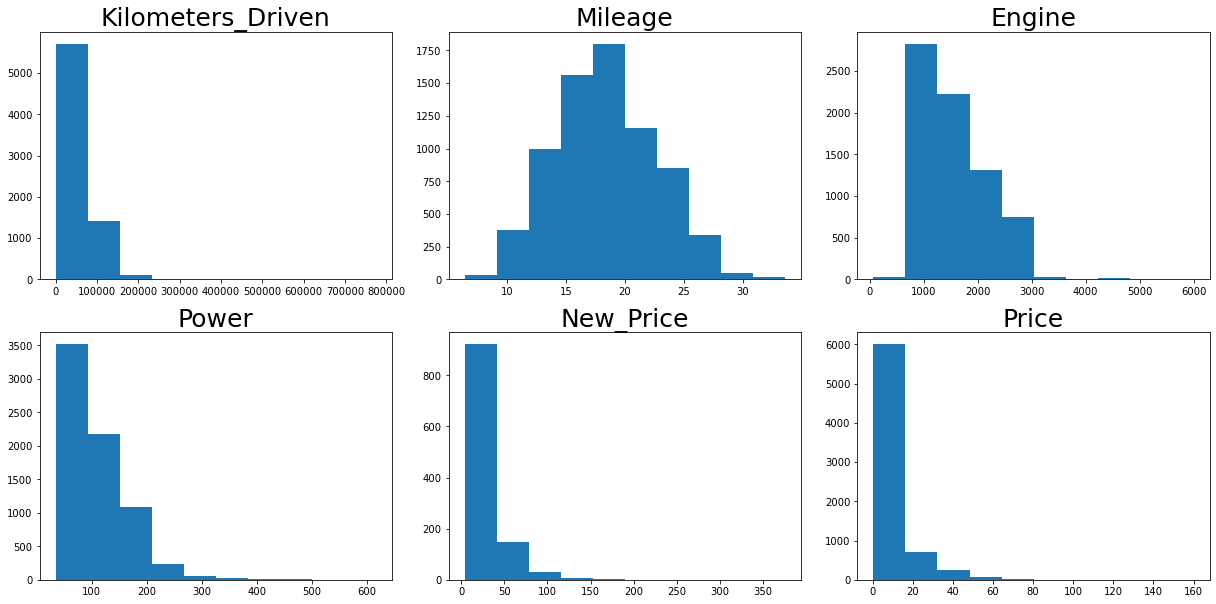

In [31]:
# lets plot histogram of all numeric variables
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()
all_col.remove('Year')
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

- Mileage has a normal distribution, Engine also has normal distribution with a couple of outliers
- Power, Kilometers and Price are right skewed
    * Kilometers_Driven has outliers which might have made it right skewed, which can be understandable as there are cars from 1996 which can have more Kilometers
    * Price also is highly right skewed might be because of outliers

In [32]:
# looking at value counts for categorical variables

num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df.dtypes == 'category'].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Name: Location, dtype: int64
Only displaying first 10 of 11 values.



Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64



Manual       5204
Automatic    2049
Name: Transmission, dtype: int64



First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64



5.0     6054
7.0      796
8.0      170
4.0      119
NaN       47
6.0       38
2.0       18
10.0       8
9.0        3
Name: Seats, dtype: int64





- There are cars from 11 different cities
- There are 3852 diesel cars
- Majority of cars in the dataset have Owner type First
- There are 47 cars which has a missing value of seats

## Bivariate Analysis

### Correlation with Pairplot

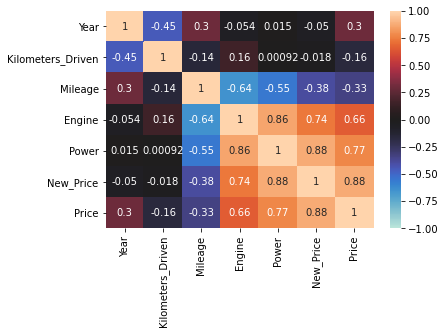

In [33]:
sns.heatmap(df.corr(), annot = True,vmin = -1,vmax = 1, center = 0);

- Kilometers_Driven has a negative correlation with Price which means higher kilometers the car has travelled lower is the price.
- Year, Engine have a positive relation with price which means latest car with higher engine capacity has higher price.
- Engine and mileage have negative correlation which means more fuel is consumed by cars with bigger engine.
- Power and engine have a positive correlation which means bigger engines have more power and comsume more fuel.
- Engine and Power seems to have a strong positive relation with Price whereas mileage has negative relation which means bigger engine and bigger power is tend to be higher priced.
- From the above observations we can state that cars with bigger engine will have high power and less mileage and these type of cars are priced higher.

### Price vs Kilometers_Driven vs Transmission

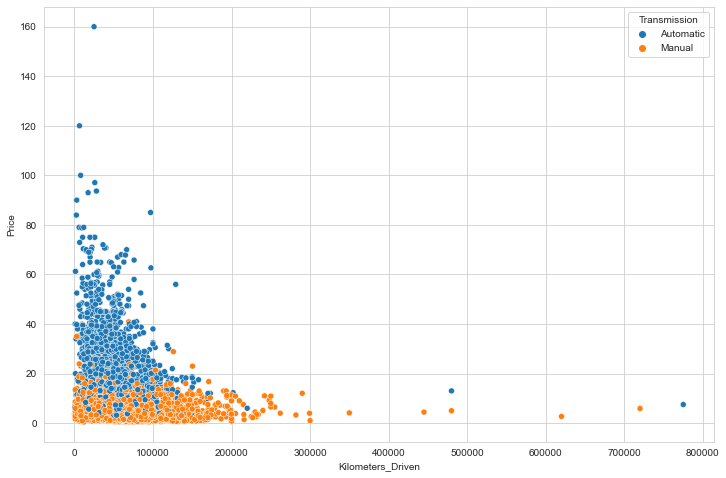

In [117]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = "Kilometers_Driven", y = "Price", hue = "Transmission", data = df);
plt.savefig("KMvsPrice.png")

- Cars with more kilometers driven tend to have lower price
- Cars with automatic transmission have higher prices when compared to one with manual transmission cars
- There are very few automatic cars that have more than 25000 Kilometers_Driven

### Price vs Kilometers_Driven vs Fuel_Type

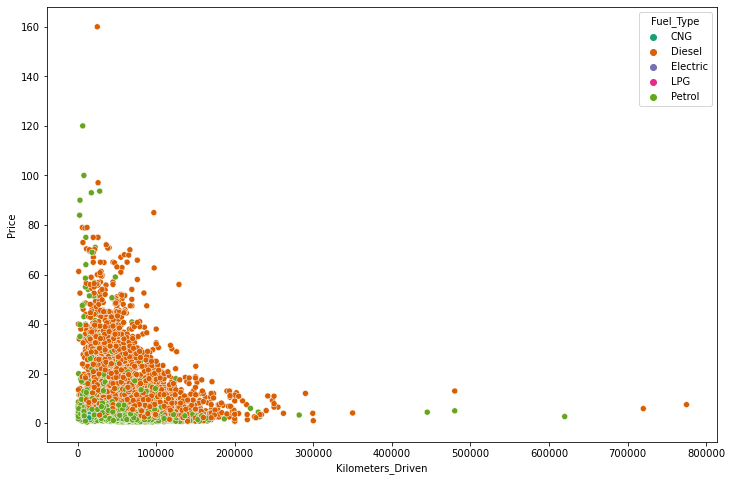

In [35]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = "Kilometers_Driven", y = "Price", hue = "Fuel_Type", data = df,palette = "Dark2");

- There are no CNG, Electric and LPG cars that have more than 200000 Kilometers which can be because the usage of these fuel types has started recently

### Engine vs Price vs Owner_Type

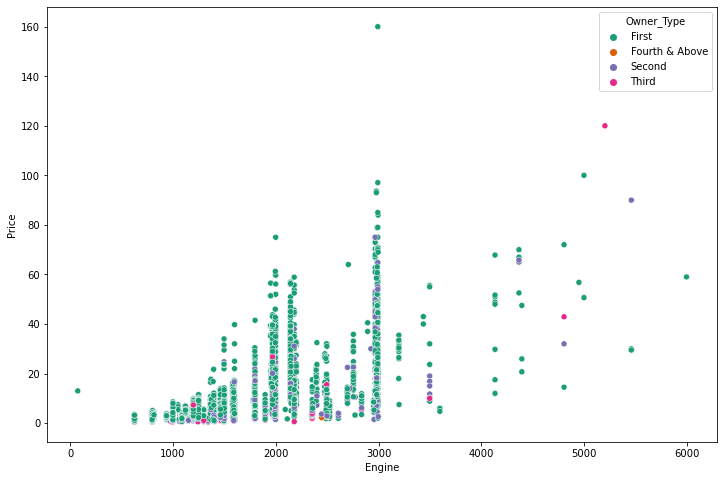

In [36]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = "Engine", y = "Price", hue = "Owner_Type", data = df,palette = "Dark2");

- Automatic cars tend to have bigger engines
- Price increased with engine

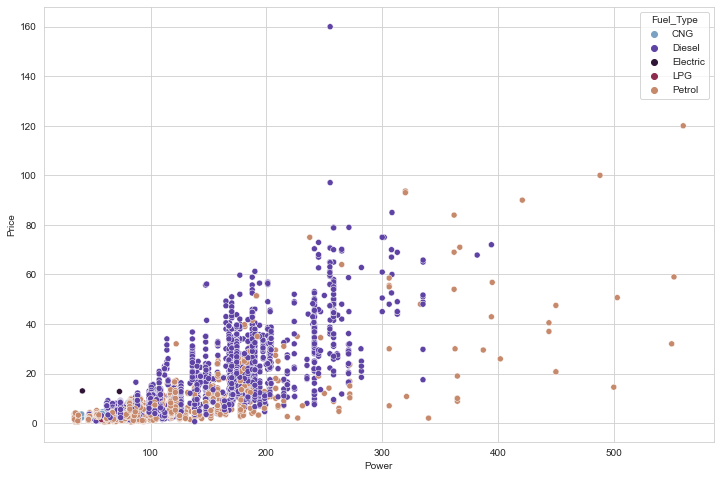

In [119]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = "Power", y = "Price", hue = "Fuel_Type", data = df,palette = "twilight");
plt.savefig("powervsPrice.png")

- Cars with bigger engine capacity run either with Petrol or diesel

### Price vs Year vs Owner_Type

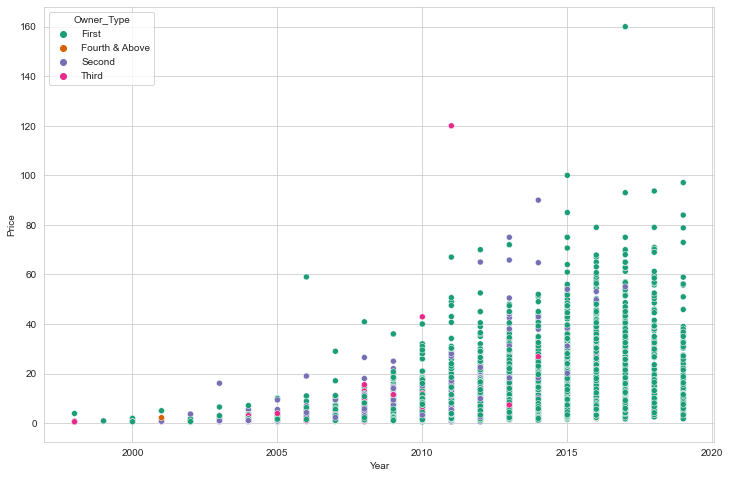

In [120]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = "Year", y = "Price", hue = "Owner_Type", data = df,palette = "Dark2");
plt.savefig("YearvsPrice.png")

- As expected latest cars tend to have higher prices when compared to older cars

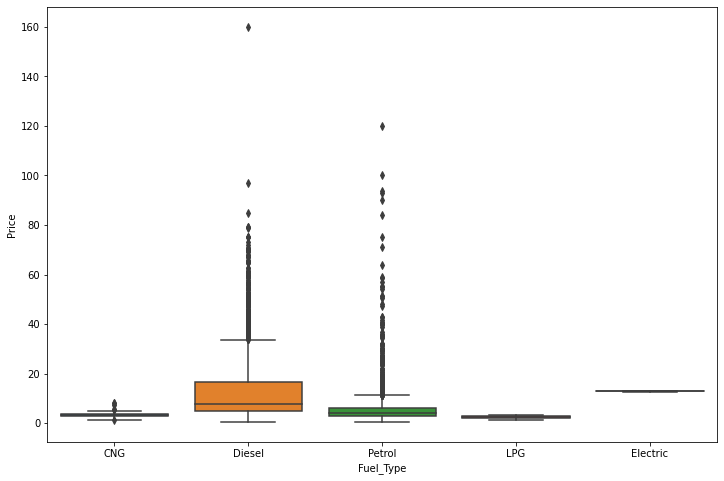

In [39]:
plt.figure(figsize = (12,8))
sns.boxplot(x = "Fuel_Type", y = "Price", data = cars);

### Feature Engineering
We will create a new feature called Make which will be the Brand of the car, which will have some weightage as some Brand of cars have more value when compared to other and can impact on Price.

In [40]:
#Creating new feature
df['Make'] = df.Name.str.split().str.get(0).str.title()
#.title() converts the string to start with upper case letter and rest of the letters to be lower case
df.loc[cars["Name"].str.startswith("Land Rover"),"Make"] = "Land Rover"
df["Make"].nunique()

32

We can now drop name as there are 2041 unique cars and for model building it will be easier if we have less number of categorical variables, which significantly dropped to 32 different brands that exist in the dataset

In [41]:
df["Make"] = df["Make"].astype("category")

In [42]:
df.drop(["Name"], axis = 1, inplace = True)

In [43]:
df.drop(["New_Price"], axis = 1, inplace = True)#Removing New_Price as more than 80% of the data is missing

In [44]:
df["Seats"] = df["Seats"].astype("float64")# To impute missing values, we convert seats to float as int cannot have NaN values

In [45]:
df["Seats"] = df.groupby(["Make"])["Seats"].apply(lambda x:x.fillna(x.median()))

In [46]:
df["Seats"] = df["Seats"].astype("category")# Once we impute we will convert this back to category for model building purpose

In [47]:
df.isnull().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               80
Engine                40
Power                136
Seats                  0
Price                178
Make                   0
dtype: int64

Dropping the rest of the missing values is better as imputing them with median could skew the results as we saw in pairplot, they have correlation with Price

In [48]:
df.dropna(axis = 0, inplace = True)

In [49]:
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Make                 0
dtype: int64

- There are no missing values, we can start treating outliers

### Outlier Treatment

In [50]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [51]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df,numerical_col)

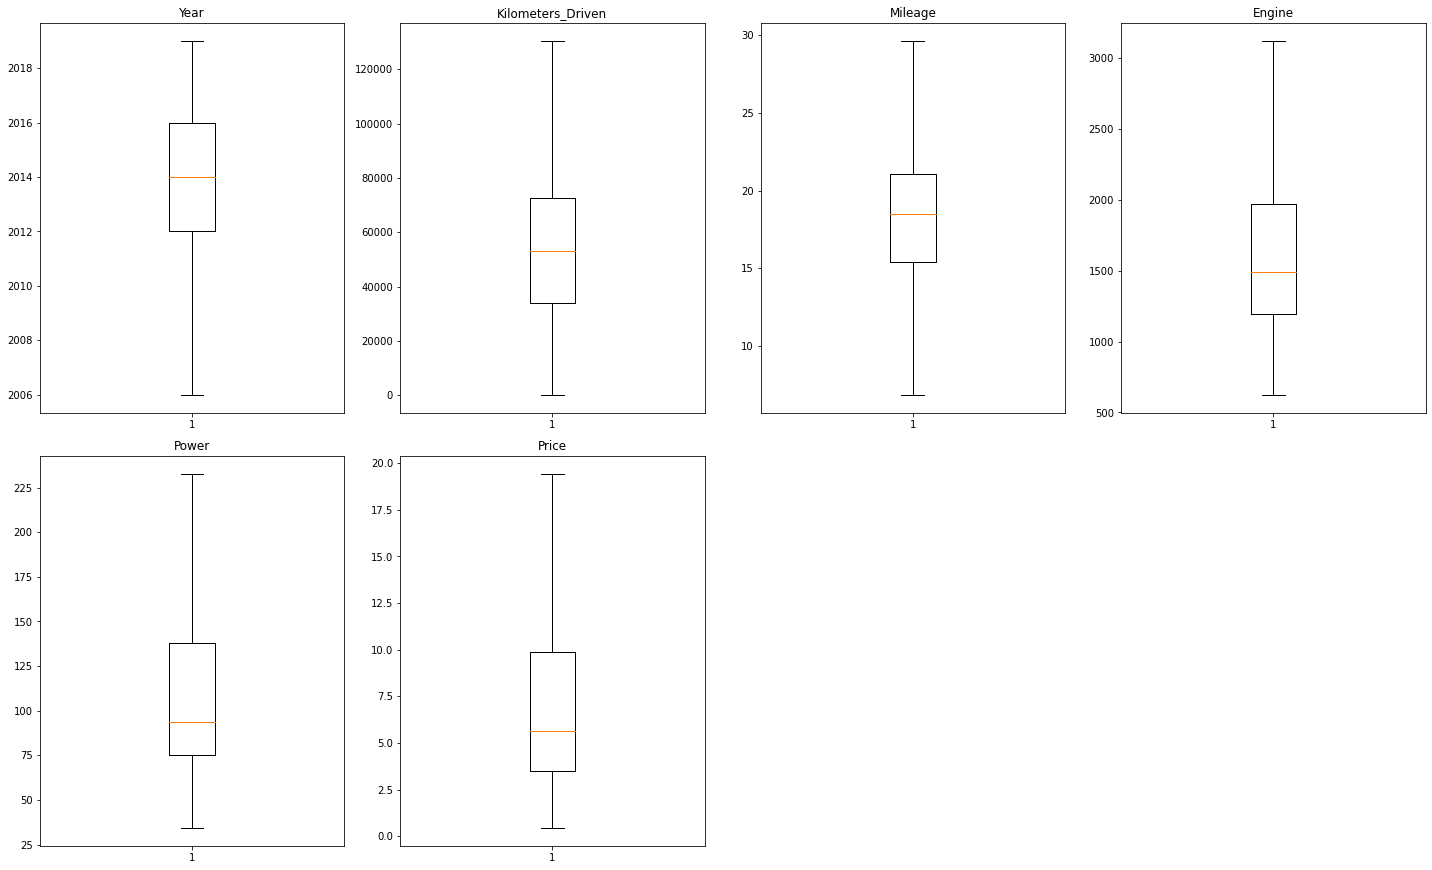

In [52]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

# Model Building

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6910 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6910 non-null   category
 1   Year               6910 non-null   int64   
 2   Kilometers_Driven  6910 non-null   float64 
 3   Fuel_Type          6910 non-null   category
 4   Transmission       6910 non-null   category
 5   Owner_Type         6910 non-null   category
 6   Mileage            6910 non-null   float64 
 7   Engine             6910 non-null   float64 
 8   Power              6910 non-null   float64 
 9   Seats              6910 non-null   category
 10  Price              6910 non-null   float64 
 11  Make               6910 non-null   category
dtypes: category(6), float64(5), int64(1)
memory usage: 421.1 KB


In [54]:
#Defining X and y variables
X = df.drop(['Price'], axis=1)
y = df[['Price']]

print(X.head())
print(y.head())
print(X.shape)
print(y.shape)

     Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010            72000.0       CNG       Manual      First   
1        Pune  2015            41000.0    Diesel       Manual      First   
2     Chennai  2011            46000.0    Petrol       Manual      First   
3     Chennai  2012            87000.0    Diesel       Manual      First   
4  Coimbatore  2013            40670.0    Diesel    Automatic     Second   

   Mileage  Engine   Power Seats     Make  
0    26.60   998.0   58.16   5.0   Maruti  
1    19.67  1582.0  126.20   5.0  Hyundai  
2    18.20  1199.0   88.70   5.0    Honda  
3    20.77  1248.0   88.76   7.0   Maruti  
4    15.20  1968.0  140.80   5.0     Audi  
   Price
0   1.75
1  12.50
2   4.50
3   6.00
4  17.74
(6910, 11)
(6910, 1)


### Create Dummy Variables

In [55]:
X = pd.get_dummies(X, columns=['Location', 'Fuel_Type', 'Transmission','Seats', 'Owner_Type', 'Make'], drop_first=True)
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Make_Nissan,Make_Opelcorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
0,2010,72000.0,26.60,998.0,58.16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000.0,19.67,1582.0,126.20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000.0,18.20,1199.0,88.70,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000.0,20.77,1248.0,88.76,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670.0,15.20,1968.0,140.80,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

X_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Make_Nissan,Make_Opelcorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
3656,2012,11000.0,16.20,995.0,62.10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1519,2017,28226.0,28.40,1248.0,73.75,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5874,2014,40000.0,10.50,1796.0,157.70,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6519,2011,46279.0,16.47,1198.0,73.90,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6617,2014,55000.0,11.78,2143.0,167.62,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Model, Train and Evaluate

In [57]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCoefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)       

Intercept of the linear equation: [-1164.66129118]

Coefficients of the equation are: [[ 5.82386415e-01 -1.09738346e-05 -1.35954850e-01 -6.23754212e-05
   4.41902122e-02  6.89124754e-01  6.56520035e-02  3.42476819e-01
  -5.18060572e-01  5.76172830e-01 -5.89143162e-05 -2.56635024e-01
  -1.18837885e+00 -3.26915901e-01 -9.91418638e-02  1.62379392e+00
   2.22044605e-16  4.26324790e-01 -2.03610266e-01 -1.07433025e+00
  -4.27031802e-02 -9.91112769e-01 -3.85347970e-01  2.08686579e-01
  -4.77609435e-01 -2.00711815e+00 -6.69712847e-02  1.67758753e-01
  -2.81066088e-01 -5.74991198e-01  3.75719525e+00 -8.88178420e-16
   3.06875574e+00 -3.11595704e+00 -3.85745896e+00 -2.64077729e+00
  -2.13291600e+00 -1.90315799e+00 -2.22044605e-15 -2.12260610e+00
  -1.80626627e+00 -2.77449734e+00  3.85628593e+00  3.83869352e+00
   5.11750260e+00  3.47280866e+00 -3.04681784e+00 -1.75206337e+00
   2.99140432e+00  6.98511962e+00  6.07002400e-03 -2.32017754e+00
   0.00000000e+00  1.27265091e+00 -2.33889971e+00 -1.463

### Model Performances

In [58]:
# Mean Absolute Error on test
mean_absolute_error(y_test, pred)


1.3641131033675356

The mean absolute error (MAE) is the simplest regression error metric to understand. We'll calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. We then take the average of all these residuals. Effectively, MAE describes the typical magnitude of the residuals.

In [59]:
# RMSE on test data
mean_squared_error(y_test, pred)**0.5

1.8265141799332845

The root mean square error (RMSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. And then takes the square root of the value.

In [60]:
# R2 Squared: on test
r2_score(y_test, pred)

0.8947468652096434

- R^2 (coefficient of determination) regression score function.

- Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

- R^2 value is 0.89 which means that in this model independent variables are able to explain 89% of variances in dependent variable

# Conclusion

- The Training and testing scores are around 89% and both scores are comparable, hence the model is a good fit.

- R2_score is 0.89, that explains 89% of total variation in the dataset. So, overall the model is very satisfactory.

# **statsmodels**

- Here is the complete syntax to perform the linear regression in Python using statsmodels.
- Statsmodels is a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration

In [61]:
# Lets us build linear regression model using statsmodel 

X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     756.7
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        23:39:51   Log-Likelihood:                -9688.6
No. Observations:                4837   AIC:                         1.949e+04
Df Residuals:                    4780   BIC:                         1.986e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

** Observation**
- P value of a variable indicates if the variable is significant or not. If we consider significance level to be 0.05 (5%) than any variable with p-values less than 0.05 would be considered significant.
- Negative values of coefficient shows that, Price of the car deceases with their increase.
- Positive values of coefficient shows that, Price of the car inceases with their increase.
- But these variables might contain Multicollinearity which affects the p values, so we first need to deal with multicollinearity and then look for p values 
- We can see Engine has p value greater than 0.05, but we will check for multicollinearity first

## Checking the Linear Regression Assumptions

1. No Multicollinearity
2. Mean of residuals should be 0
3. No Heteroscedacity
4. Linearity of variables
5. Normality of error terms


### Let's check Multicollinearity using VIF scores

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

C:\Users\Owner\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Series before feature selection: 

const                998331.443642
Year                      2.227182
Kilometers_Driven         1.974653
Mileage                   4.270519
Engine                   11.096501
                         ...      
Make_Smart                     NaN
Make_Tata               210.370144
Make_Toyota             465.639389
Make_Volkswagen         352.300938
Make_Volvo               28.408899
Length: 62, dtype: float64



### We remove Engine and see if there is an impact on Adjusted R square 

In [63]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train2 = X_train1.drop('Engine', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                1.000665e+06
Year                 2.258382e+00
Kilometers_Driven    1.956721e+00
Mileage              3.837463e+00
Power                5.433007e+00
                         ...     
Make_Smart                    NaN
Make_Tata            1.396267e+02
Make_Toyota          3.236835e+02
Make_Volkswagen      2.552854e+02
Make_Volvo           1.939845e+01
Length: 61, dtype: float64



In [64]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     770.5
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        23:39:54   Log-Likelihood:                -9688.7
No. Observations:                4837   AIC:                         1.949e+04
Df Residuals:                    4781   BIC:                         1.985e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [65]:
# we drop the one with the highest vif values
X_train3 = X_train1.drop('Power', axis=1)
vif_series3 = pd.Series([variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])],index=X_train3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

C:\Users\Owner\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Series before feature selection: 

const                980662.929999
Year                      2.211173
Kilometers_Driven         1.957701
Mileage                   4.298009
Engine                    6.239132
                         ...      
Make_Smart                     NaN
Make_Tata               139.320299
Make_Toyota             323.205769
Make_Volkswagen         254.566637
Make_Volvo               19.252184
Length: 61, dtype: float64



In [66]:
olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     668.6
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        23:39:56   Log-Likelihood:                -9994.9
No. Observations:                4837   AIC:                         2.010e+04
Df Residuals:                    4781   BIC:                         2.046e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Now no feature has p value greater than 0.05, so we'll consider features in X_train2 as the final ones and olsres1 as final model

### Observations
* Now Adjusted R-squared is 0.897, Our model is able to explain 89.7% of variance that shows model is good.
* The Adjusted-R squared in Olsres0 it was 89.7% (Where we considered all the variables) this shows that the variables we dropped were not affecting the model much.

### Now we'll check rest of the assumptions on model - olsres1
1. Mean of residuals should be 0 
2. Linearity of variables
3. Normality of error terms
4. No Heteroscedacity

In [67]:
residual= olsres1.resid
np.mean(residual)

9.979746888983413e-12

* Mean of redisuals is very close to 0.

### TEST FOR LINEARITY 

**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**

* Make a plot of fitted values vs Residuals, if they don’t follow any pattern, they we say the model is linear otherwise model is showing signs of non-linearity.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear

In [68]:
residual=olsres1.resid
fitted=olsres1.fittedvalues #predicted values

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


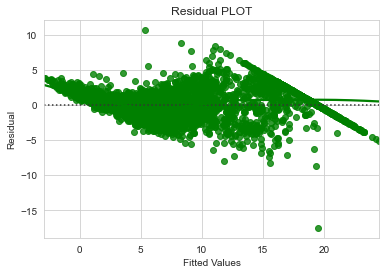

In [122]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="green",lowess=True)
plt.savefig("Scatterplot.png")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

Scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values) - If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn’t capture non-linear effects.
No pattern in residual hence 1st assumptions is satisfied

### TEST FOR NORMALITY

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


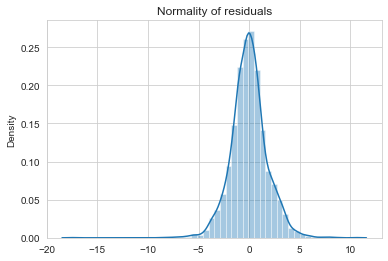

In [123]:
sns.distplot(residual)
plt.savefig("QQplot.png")
plt.title('Normality of residuals')
plt.show()

#### The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

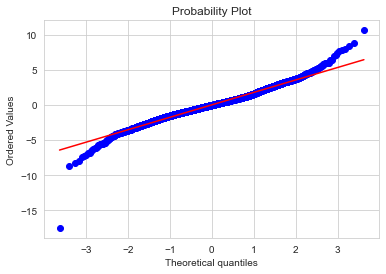

In [71]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

### TEST FOR HOMOSCEDASTICITY

* Test -goldfeldquandt test

* Homoscedacity - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* Heteroscedacity - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

Null hypothesis : Residuals are homoscedastic

Alternate hypothesis : Residuals have hetroscedasticity

In [72]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train2)
lzip(name, test)

[('F statistic', 1.047594200513979), ('p-value', 0.12914840479472434)]

Since p-value > 0.05 we can say that the residuals are homoscedastic. This assumption is therefore valid in the data.

### Now we have checked all the assumptions and they are satisfied, so we can move towards prediction part

### Predicting on the test data

In [73]:
X_train2.columns

Index(['const', 'Year', 'Kilometers_Driven', 'Mileage', 'Power',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual', 'Seats_4.0',
       'Seats_5.0', 'Seats_6.0', 'Seats_7.0', 'Seats_8.0', 'Seats_9.0',
       'Seats_10.0', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Make_Audi', 'Make_Bentley', 'Make_Bmw',
       'Make_Chevrolet', 'Make_Datsun', 'Make_Fiat', 'Make_Force', 'Make_Ford',
       'Make_Hindustan', 'Make_Honda', 'Make_Hyundai', 'Make_Isuzu',
       'Make_Jaguar', 'Make_Jeep', 'Make_Lamborghini', 'Make_Land Rover',
       'Make_Mahindra', 'Make_Maruti', 'Make_Mercedes-Benz', 'Make_Mini',
       'Make_Mitsubishi', 'Make_Nissan', 'Make_Opelcorsa', 'Make_Porsche',
    

In [74]:
X_test_final = X_test[X_train2.columns]

In [75]:
X_test_final.head()

,const,Year,Kilometers_Driven,Mileage,Power,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Make_Nissan,Make_Opelcorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
5801,1.0,2013,64000.0,14.53,138.1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1024,1.0,2012,42750.0,17.00,118.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6249,1.0,2016,95942.0,15.40,120.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5847,1.0,2015,27000.0,19.50,141.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4194,1.0,2017,16900.0,21.10,100.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
y_pred = olsres1.predict(X_test_final)

### Checking the performance on train and test: metric used - RMSE

In [77]:
#Checking root mean squared error on both train and test set  

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_train, fitted))
print('Train error:',rms)

rms1 = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test error:',rms1)

Train error: 1.7933855132601297
Test error: 1.8400700423208587


### Now we can finally see that we have low test and train error, also both the errors are comparable, so our model is not suffering from overfitting .
### Hence we can conclude the model "olsres1" is good for prediction as well as inference purpose


In [78]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     770.5
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        23:40:02   Log-Likelihood:                -9688.7
No. Observations:                4837   AIC:                         1.949e+04
Df Residuals:                    4781   BIC:                         1.985e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Observations
* Now this is our final model which follows all the assumptions and this can be used for interpretations

          1. Year of the car is very significant, as expected. There are two variable - Kilometers_Driven and Mileage. As these two increase, the Price of the car decreases, as visible in the negative coeefficinet sign 
          2. Except Petrol cars, other fuel types tend to increase the Price of the car
          3. Car Brands that have positive coefficient value increases the car price because of the brand value
          4. First Owner cars tend to go for higher prices than other ownership types

## Forward Feature Selection 
### forward feature selection starts with an empty model and adds in variables one by one.
* In each forward step, you add the one variable that gives the single best improvement to your model.


In [79]:
X_train_new = X_train2.drop('const', axis = 1)

* We'll use forward feature selection on variables, we received after removing multicollinearity
* Also we'll remove const term, because sklearn adds that automatically unlike statmodels

In [80]:
!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#from sklearn.lin

In [81]:
clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 60,forward=True,
           floating=False, scoring= 'r2',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train_new, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.0s finished

[2021-05-07 23:40:09] Features: 1/60 -- score: 0.6703052285302329[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    1.7s finished

[2021-05-07 23:40:10] Features: 2/60 -- score: 0.7885761439532606[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    1.6s finished

[2021-05-07 23:40:12] Features: 3/60 -- score: 0.8047345743633082[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    3.4s finished

[2021-05-07 23:41:00] Features: 28/60 -- score: 0.8944009319661677[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.5s finished

[2021-05-07 23:41:02] Features: 29/60 -- score: 0.8947150342641386[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.6s finished

[2021-05-07 23:41:04] Features: 30/60 -- score: 0.8949523490109446[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.5s finished

[2021-05-07 23:41:05] Features: 31/

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished

[2021-05-07 23:41:45] Features: 56/60 -- score: 0.8958573803052469[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s finished

[2021-05-07 23:41:45] Features: 57/60 -- score: 0.8959443367943779[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished

[2021-05-07 23:41:45] Features: 58/60 -- score: 0.8958610648759683[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished

[2021-05-07 23:41:45] Features: 59/

In [82]:
# Now Which features are important?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


In [83]:
X_train2.columns[feat_cols]

Index(['const', 'Year', 'Kilometers_Driven', 'Mileage', 'Power',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual', 'Seats_4.0',
       'Seats_5.0', 'Seats_6.0', 'Seats_7.0', 'Seats_8.0', 'Seats_9.0',
       'Seats_10.0', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Make_Audi', 'Make_Bentley', 'Make_Bmw',
       'Make_Chevrolet', 'Make_Datsun', 'Make_Fiat', 'Make_Force', 'Make_Ford',
       'Make_Hindustan', 'Make_Honda', 'Make_Hyundai', 'Make_Isuzu',
       'Make_Jaguar', 'Make_Jeep', 'Make_Lamborghini', 'Make_Land Rover',
       'Make_Mahindra', 'Make_Maruti', 'Make_Mercedes-Benz', 'Make_Mini',
       'Make_Mitsubishi', 'Make_Nissan', 'Make_Opelcorsa', 'Make_Porsche',
    

### Now we will fit a sklearn model using these features only

In [84]:
X_train_final = X_train2[X_train2.columns[feat_cols]]

In [85]:
#
X_test.columns

Index(['const', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual', 'Seats_4.0',
       'Seats_5.0', 'Seats_6.0', 'Seats_7.0', 'Seats_8.0', 'Seats_9.0',
       'Seats_10.0', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Make_Audi', 'Make_Bentley', 'Make_Bmw',
       'Make_Chevrolet', 'Make_Datsun', 'Make_Fiat', 'Make_Force', 'Make_Ford',
       'Make_Hindustan', 'Make_Honda', 'Make_Hyundai', 'Make_Isuzu',
       'Make_Jaguar', 'Make_Jeep', 'Make_Lamborghini', 'Make_Land Rover',
       'Make_Mahindra', 'Make_Maruti', 'Make_Mercedes-Benz', 'Make_Mini',
       'Make_Mitsubishi', 'Make_Nissan', 'Make_Opelcorsa', 'Make_Pors

In [86]:
X_test_final = X_test[X_train_final.columns]

In [87]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train_final, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCoefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predicted = linearregression.predict(X_train_final)
pred = linearregression.predict(X_test_final)                              

Intercept of the linear equation: [-1137.98452934]

Coefficients of the equation are: [[ 1.70076169e-11  5.70057070e-01 -1.20051723e-05 -1.23738425e-01
   4.54890460e-02  7.49731477e-01  1.17552839e-01  4.02064032e-01
  -3.98425525e-01  6.30746253e-01  4.24481896e-02 -1.54875270e-01
  -1.10275343e+00 -3.47307287e-01  5.49324041e-03  1.22245999e+00
   1.27009514e-12  3.62651585e-02 -5.42355683e-01 -1.08163348e+00
   5.97627111e-01 -1.25986878e-01  7.87609082e-01  1.01719493e+00
   3.94204575e-01  6.97921395e-01  8.12305343e-01 -6.15833239e-01
  -3.49902094e-01 -5.25332347e-01  7.91469779e-01  4.24356249e+00
  -1.36489918e-01 -5.92042594e+00 -6.69242948e+00 -5.30266538e+00
  -3.36619621e-13 -4.69398184e+00  1.58539848e-13 -4.97924695e+00
  -4.58132482e+00 -3.99997414e+00  8.43686407e-01  7.68178477e-01
   2.83065148e+00  1.32778930e+00 -5.78411147e+00 -4.47983031e+00
   2.52037113e-01  3.68751510e+00 -2.73465017e+00 -5.00706192e+00
   0.00000000e+00 -1.36441555e+00 -5.08634396e+00 -4.323

In [88]:
# R2 Squared: on train and test
print('r2 score on train data :', r2_score(y_train, predicted))
print('r2 score on test data :', r2_score(y_test, pred))

r2 score on train data : 0.898564037997834
r2 score on test data : 0.8966181675054891


In [89]:
# RMSE on train and test data
print('rmse on train data :', mean_squared_error(y_train, predicted)**0.5)
print('rmse on test data :', mean_squared_error(y_test, pred)**0.5)

rmse on train data : 1.793901733549804
rmse on test data : 1.8480977243285925


### Both r2 score and RMSE  shows that model fitted is good, has no overfitting and can be used for making predictions 

### we can observe here, the results from 'olsres1' and 'linearegession' model are approximately same